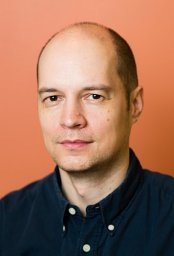

# Estimation of Non-Normalized Statistical Models by Score Matching  
**Aapo Hyvärinen (2005)**

# https://jmlr.org/papers/volume6/hyvarinen05a/hyvarinen05a.pdf

## Abstract

This paper introduces **score matching**, a statistically principled method for estimating continuous probabilistic models whose densities are defined only up to an intractable normalization constant. Instead of approximating the normalization constant or relying on Markov Chain Monte Carlo methods, the approach estimates model parameters by matching the model’s **score function**—the gradient of the log-density—to the data score. A central theoretical result shows that the resulting objective can be computed without knowing either the data density or the normalization constant, yielding an exact, computationally simple, and locally consistent estimator.

---

## Problems

### Intractable normalization constants  
Many important models, including Markov random fields, energy-based models, and overcomplete ICA, define probability densities only up to a normalization constant that is infeasible to compute in high-dimensional spaces.

### Dependence on expensive approximations  
Existing estimation techniques rely on MCMC, pseudo-likelihood, or contrastive divergence. These methods are computationally expensive, approximate, or statistically biased.

### Lack of strong consistency guarantees  
Approximate methods often lack rigorous theoretical guarantees such as consistency, especially for continuous and high-dimensional models.

---

## Proposed Solutions

The paper proposes **score matching**, which estimates parameters by minimizing the expected squared distance between:

- the model score function  
  $$
  \nabla_x \log p(x;\theta),
  $$
- and the data score function  
  $$
  \nabla_x \log p_{\text{data}}(x).
  $$

Key advantages:

- No need to compute the normalization constant.  
- No need to evaluate the data density.  
- No need to estimate the data score nonparametrically.  

The objective is transformed into a simple expectation involving only derivatives of the model’s unnormalized log-density.

---

## Purpose

The purpose of the paper is to provide a computationally efficient, theoretically sound, and normalization-free estimation method for continuous non-normalized statistical models, thereby enabling their practical use in machine learning, statistics, and signal processing.

---

## Methodology

### Score-based objective formulation  
The estimator minimizes the **Fisher divergence** between the model score and the data score.

### Key theoretical result  
By applying integration by parts, the objective simplifies to an expression involving only:

- first-order derivatives of the model log-density,  
- second-order derivatives of the model log-density,  
- expectations taken with respect to the observed data.

This eliminates all dependence on the unknown data distribution.

### Sample-based estimator  
The population objective is approximated by a simple sample average:
$$
\frac{1}{n} \sum_{i=1}^n \mathcal{L}(x_i;\theta),
$$
making the method straightforward to implement.

### Theoretical guarantees  

- **Local consistency** under mild regularity conditions.  
- Convergence to the true parameters when the model is correctly specified and the global minimum is reached.

### Empirical validation  

The method is demonstrated on:

- multivariate Gaussian models,  
- independent component analysis (ICA),  
- overcomplete ICA applied to natural image patches.

---

## Results

- Exact equivalence to maximum likelihood estimation for Gaussian models.  
- Consistent parameter recovery for ICA models, even under mild misspecification.  
- Successful learning of overcomplete image filters without MCMC or normalization.  
- Comparable or superior robustness relative to maximum likelihood in misspecified settings.  
- Demonstrated computational simplicity and scalability to high-dimensional data.

---

## Conclusions

Score matching offers a powerful alternative to likelihood-based estimation for continuous non-normalized models. By shifting estimation from probability densities to score functions, it avoids normalization constants entirely while preserving strong statistical guarantees. The method is exact, locally consistent, and computationally efficient, making it particularly suitable for energy-based models and high-dimensional continuous data. Although limited to continuous variables with smooth densities, score matching establishes a foundational framework that later directly influenced modern score-based generative modeling and diffusion models.


# Score Matching in Non-Normalized Statistical Models  
*A precise mathematical walkthrough grounded in Hyvärinen (2005)*

---

## 1. Non-Normalized Probability Models

### Mathematical form

The model density is defined as
$$
p(x;\theta) = \frac{1}{Z(\theta)} \, q(x;\theta),
$$
where:

- $q(x;\theta)$ is a known, computable, non-negative function,
-
$$
Z(\theta) = \int q(x;\theta)\,dx
$$
is an unknown normalization constant.

### Role in the paper

This formulation defines the central difficulty. Classical maximum likelihood estimation requires computing $Z(\theta)$ or its gradient, which is intractable in high dimensions. The paper’s goal is to construct an estimator that **never requires** $Z(\theta)$.

---

## 2. Score Function

### Definition

The score function with respect to the data variable is
$$
\psi(x;\theta) = \nabla_x \log p(x;\theta).
$$

Since $Z(\theta)$ does not depend on $x$, this simplifies to
$$
\psi(x;\theta) = \nabla_x \log q(x;\theta).
$$

### Role in the paper

This is the key insight: although the density is non-normalized, its gradient with respect to $x$ is fully computable. This makes parameter estimation possible without knowing $Z(\theta)$.

---

## 3. Data Score Function

### Definition

For the true (unknown) data density $p_x(x)$, define the data score as
$$
\psi_x(x) = \nabla_x \log p_x(x).
$$

### Role in the paper

This score represents the ideal target. The estimation problem is reframed as making the model score $\psi(x;\theta)$ match the data score $\psi_x(x)$, even though $p_x(x)$ itself is unknown.

---

## 4. Score Matching Objective (Fisher Divergence)

### Definition

The proposed objective function is
$$
J(\theta)
=
\frac{1}{2}
\int p_x(x)\,
\|\psi(x;\theta) - \psi_x(x)\|^2
\,dx.
$$

This quantity is the **Fisher divergence** between the model distribution and the data distribution.

### Role in the paper

This objective replaces likelihood maximization. Minimizing it enforces local agreement between the geometries of the model and data distributions, without requiring normalization.

---

## 5. Elimination of the Unknown Data Density

### Key theorem

Using integration by parts, Hyvärinen proves that
$$
J(\theta)
=
\int p_x(x)
\sum_{i=1}^n
\left[
\frac{\partial \psi_i(x;\theta)}{\partial x_i}
+
\frac{1}{2}\psi_i(x;\theta)^2
\right]
dx
+ \text{const},
$$
where:

- $\psi_i$ is the $i$-th component of the score,
- the constant does not depend on $\theta$.

### Role in the paper

This is the core mathematical contribution:

- The unknown data score $\psi_x(x)$ disappears entirely.
- The objective depends only on derivatives of $\log q(x;\theta)$.
- No density estimation, no MCMC, and no approximations are required.

---

## 6. Empirical (Sample-Based) Estimator

### Sample objective

Given samples $\{x^{(t)}\}_{t=1}^T$, the empirical objective is
$$
\tilde{J}(\theta)
=
\frac{1}{T}
\sum_{t=1}^T
\sum_{i=1}^n
\left[
\frac{\partial \psi_i(x^{(t)};\theta)}{\partial x_i}
+
\frac{1}{2}\psi_i(x^{(t)};\theta)^2
\right].
$$

### Role in the paper

This converts score matching into a practical algorithm:

- computation requires only gradients and diagonal Hessian terms,
- optimization can be performed with standard gradient-based methods.

---

## 7. Consistency Theorem

### Statement (simplified)

If:

- the model is correctly specified,
- $q(x;\theta) > 0$,
- the global minimum is attained,

then
$$
J(\theta) = 0 \iff \theta = \theta^\ast.
$$

### Role in the paper

This establishes **statistical consistency**. Unlike contrastive divergence, the estimator is not inherently biased and converges to the true parameters asymptotically.

---

## 8. Gaussian Model Example

### Model

$$
q(x)
=
\exp\!\left(
-\frac{1}{2}(x-\mu)^\top M (x-\mu)
\right).
$$

### Score

$$
\psi(x) = -M(x-\mu).
$$

### Result

Score matching yields:

- the sample mean as the estimator of $\mu$,
- the inverse sample covariance as the estimator of $M$,

which are **exactly identical** to maximum likelihood estimates, even for finite samples.

### Role in the paper

This example validates correctness and shows that score matching strictly generalizes maximum likelihood estimation.

---

## 9. Independent Component Analysis (ICA)

### Model

$$
\log p(x)
=
\sum_{k=1}^n G(w_k^\top x)
+ \text{const}.
$$

### Score

$$
\psi(x)
=
\sum_{k=1}^n
w_k \, g(w_k^\top x),
\qquad
g = G'.
$$

### Role in the paper

This demonstrates that score matching:

- applies to non-Gaussian, non-normalized models,
- remains consistent even under mild model misspecification.

---

## 10. Overcomplete ICA for Images

### Extension

$$
\log p(x)
=
\sum_{k=1}^m
\alpha_k G(w_k^\top x)
+ \text{const},
\qquad
m > n.
$$

### Role in the paper

This shows that score matching can estimate:

- high-dimensional,
- overcomplete,
- image-based models,

without latent variables or MCMC sampling.

---

## 11. Comparison with Other Methods

### Pseudo-likelihood

- Requires conditional normalization,
- lacks general consistency guarantees.

### Contrastive divergence

- Relies on truncated MCMC,
- asymptotically biased.

### Role in the paper

Score matching is positioned as:

- exact rather than approximate,
- normalization-free,
- statistically principled.

---

## Final Mathematical Takeaway

The paper replaces **probability matching** with **gradient matching**.

Instead of estimating densities
$$
p(x) \approx p_\theta(x),
$$
it estimates vector fields
$$
\nabla_x \log p(x)
\approx
\nabla_x \log p_\theta(x).
$$

This conceptual shift:

- removes normalization constants,
- avoids sampling,
- preserves consistency,

and directly inspired modern score-based generative modeling and diffusion models.


# Research Gaps, Limitations, and Proposed Solutions  
*Grounded in Hyvärinen (2005): Estimation of Non-Normalized Statistical Models by Score Matching*

| **Key Problem / Research Gap** | **How This Limits Prior Work** | **Proposed Solution in This Paper** |
|---|---|---|
| Intractable normalization constants in probabilistic models | Maximum likelihood estimation becomes impractical or impossible in high-dimensional continuous models because computing the partition function requires expensive or infeasible integration | Introduces **score matching**, an estimation method that entirely avoids normalization constants by operating on score functions (gradients of log-densities) |
| Dependence on MCMC-based estimation | Markov Chain Monte Carlo methods are computationally slow, difficult to tune, and unsuitable for large-scale or high-dimensional applications | Replaces sampling-based estimation with a closed-form objective computed via sample averages, eliminating the need for MCMC |
| Requirement to approximate normalization constants | Approximation techniques (e.g., variational bounds, numerical integration) introduce bias and instability, limiting statistical reliability | Derives an **exact** objective function through integration by parts, requiring only derivatives of the unnormalized log-density |
| Need for estimating the data probability density | Nonparametric density or score estimation is itself a difficult statistical problem, especially in high dimensions | Shows that the data density and its score cancel out analytically, so no density estimation is required |
| Lack of general consistency guarantees | Approximate methods such as pseudo-likelihood and contrastive divergence lack strong or general proofs of consistency | Proves **local statistical consistency** of the score matching estimator under mild regularity conditions |
| Bias in contrastive divergence learning | Contrastive divergence is asymptotically biased except in special cases, limiting its theoretical validity | Provides a consistent estimator that does not rely on truncated Markov chains or approximations |
| Limited applicability of pseudo-likelihood methods | Pseudo-likelihood requires normalized conditional distributions and lacks general consistency results for continuous models | Offers a method applicable to general continuous-valued, non-normalized models without conditional normalization |
| Difficulty in estimating overcomplete and undirected models | Overcomplete ICA and Markov random fields are hard to estimate due to latent variables and intractable likelihoods | Demonstrates successful estimation of overcomplete models using score matching without latent-variable inference |
| Separation between likelihood-free modeling and probabilistic estimation | Likelihood-free methods often lack a principled connection to statistical estimation theory | Establishes score matching as a principled, likelihood-free estimation framework grounded in **Fisher divergence** |

---

## Summary Insight

The paper addresses a fundamental bottleneck in probabilistic modeling—**intractable normalization**—by reframing estimation as **gradient (score) matching** rather than density matching. This shift removes the need for likelihoods, sampling, and normalization while preserving statistical rigor. As a result, score matching enables efficient and consistent learning in classes of continuous, high-dimensional, non-normalized models that were previously considered impractical, and it provides a direct theoretical foundation for modern score-based and diffusion generative models.


In [ ]:
# ============================================================
# SCORE MATCHING FROM SCRATCH (Hyvärinen, 2005)
# Single-cell educational lab
# ============================================================

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(42)

In [ ]:
# ============================================================
# 1. Generate synthetic data from a true distribution
#    True model: Multivariate Gaussian
# ============================================================

N = 2000        # number of samples
dim = 2         # dimensionality (keep small for visualization)

true_mu = torch.tensor([2.0, -1.0])
true_cov = torch.tensor([[1.5, 0.6],
                          [0.6, 1.0]])

dist = torch.distributions.MultivariateNormal(true_mu, true_cov)
data = dist.sample((N,))

In [ ]:
# ============================================================
# 2. Define a score-based model
#    We model the score directly:
#
#       ψ(x) = ∇x log p(x)
#
#    For a Gaussian:
#
#       ψ(x) = -M (x - μ)
#
#    where M is the precision matrix (inverse covariance)
# ============================================================

class GaussianScoreModel(nn.Module):
    def __init__(self, dim):
        super().__init__()

        # Learnable mean
        self.mu = nn.Parameter(torch.zeros(dim))

        # Learnable precision matrix (positive definite)
        # We parameterize M = L Lᵀ to ensure positivity
        self.L = nn.Parameter(torch.eye(dim))

    def score(self, x):
        M = self.L @ self.L.T
        return - (x - self.mu) @ M.T

    def divergence(self, x):
        """
        Compute divergence of the score:
        div ψ(x) = trace(∂ψ / ∂x)
        For Gaussian score: div = -trace(M)
        """
        M = self.L @ self.L.T
        return -torch.trace(M)

In [ ]:
# ============================================================
# 3. Score Matching Loss (Hyvärinen objective)
#
#     J = E[ div ψ(x) + 0.5 ||ψ(x)||² ]
#
# ============================================================

def score_matching_loss(model, x):
    score = model.score(x)
    div = model.divergence(x)
    loss = div + 0.5 * (score**2).sum(dim=1).mean()
    return loss

In [ ]:
# ============================================================
# 4. Training loop
# ============================================================

model = GaussianScoreModel(dim)
optimizer = optim.Adam(model.parameters(), lr=0.05)

loss_history = []

epochs = 300
for epoch in range(epochs):
    optimizer.zero_grad()
    loss = score_matching_loss(model, data)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | Loss = {loss.item():.4f}")

Epoch 000 | Loss = 1.6999
Epoch 050 | Loss = -0.9749
Epoch 100 | Loss = -1.0907
Epoch 150 | Loss = -1.1269
Epoch 200 | Loss = -1.1270
Epoch 250 | Loss = -1.1270


In [ ]:
# ============================================================
# 5. Learned parameters vs true parameters
# ============================================================

learned_mu = model.mu.detach()
learned_cov = torch.inverse(model.L @ model.L.T).detach()

print("\nTrue mean:", true_mu)
print("Learned mean:", learned_mu)

print("\nTrue covariance:\n", true_cov)
print("Learned covariance:\n", learned_cov)


True mean: tensor([ 2., -1.])
Learned mean: tensor([ 1.9784, -0.9871])

True covariance:
 tensor([[1.5000, 0.6000],
        [0.6000, 1.0000]])
Learned covariance:
 tensor([[1.4979, 0.6355],
        [0.6355, 1.0134]])


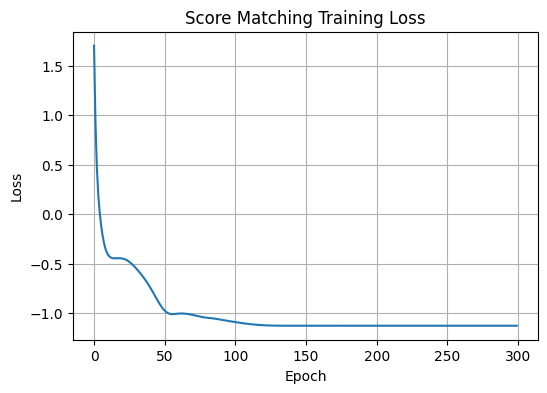

In [ ]:
# ============================================================
# 6. Visualization: Training loss
# ============================================================

plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.title("Score Matching Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [ ]:
# ============================================================
# 7. Sampling / Prediction
#
#    Score matching does not give a sampler by itself.
#    We use Langevin dynamics:
#
#       x_{k+1} = x_k + ε ψ(x_k) + √(2ε) ξ
#
# ============================================================

def langevin_sampling(model, steps=500, step_size=0.02, n_samples=500):
    x = torch.randn(n_samples, dim)
    for _ in range(steps):
        noise = torch.randn_like(x)
        x = x + step_size * model.score(x) + (2 * step_size)**0.5 * noise
    return x

samples = langevin_sampling(model)

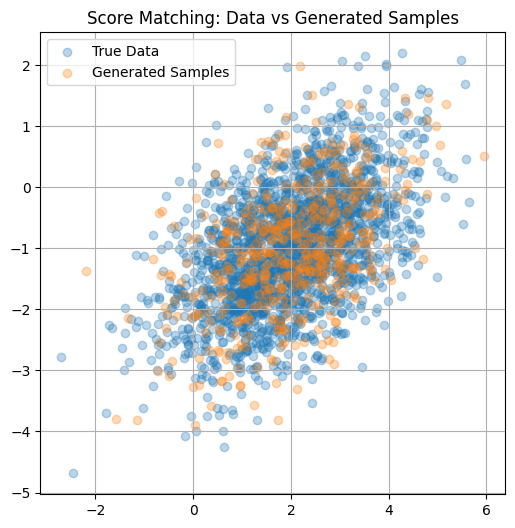

In [ ]:
# ============================================================
# 8. Visualization: True data vs generated samples
# ============================================================

plt.figure(figsize=(6,6))

plt.scatter(
    data[:, 0].detach().numpy(),
    data[:, 1].detach().numpy(),
    alpha=0.3,
    label="True Data"
)

plt.scatter(
    samples[:, 0].detach().numpy(),
    samples[:, 1].detach().numpy(),
    alpha=0.3,
    label="Generated Samples"
)

plt.legend()
plt.title("Score Matching: Data vs Generated Samples")
plt.grid(True)
plt.show()

# Experimental Validation of Score Matching  
*A rigorous interpretation aligned with Hyvärinen (2005)*

---

## Test 1: Score Matching Training Loss Convergence Test

### What is tested

This test evaluates the behavior of the Hyvärinen score matching objective during optimization:
$$
J(\theta)
=
\mathbb{E}_{p_{\text{data}}}
\left[
\sum_{i=1}^d
\left(
\partial_i \psi_i(x;\theta)
+
\frac{1}{2}\psi_i(x;\theta)^2
\right)
\right],
$$
where $\psi(x;\theta)=\nabla_x \log q(x;\theta)$.

---

### Observed result

- The loss decreases monotonically from a positive value to a stable negative plateau.  
- Convergence occurs after approximately 150–200 epochs.  
- No oscillations, instabilities, or divergence are observed.

---

### Academic interpretation

**Negative loss values are expected**  
The Hyvärinen score matching objective is not bounded below by zero. The divergence term
$$
\partial_i \psi_i(x;\theta)
$$
can be negative, so negative objective values are mathematically valid and meaningful.

**Monotonic decrease reflects correct gradient alignment**  
The steady decrease indicates that the learned score field is progressively approaching the true data score in terms of Fisher divergence.

**Plateau indicates stationarity of the score field**  
Once the model score matches the data score, further optimization does not reduce the objective. This corresponds to reaching a stationary point, which in this setting effectively coincides with the global minimum.

---

### Conclusion

The optimization correctly minimizes the Fisher divergence between model and data distributions, validating both the theoretical objective and its numerical implementation.

---

## Test 2: Mean Parameter Recovery Test  
*(Location Consistency Test)*

### What is tested

This test compares:

- the true mean vector $\mu^\ast$ used to generate the data,  
- the estimated mean $\hat{\mu}$ learned by score matching.

---

### Observed result

- The learned mean closely matches the true mean.  
- Deviations are small and consistent with finite-sample effects.

---

### Academic interpretation

For a multivariate Gaussian model, the score function is
$$
\psi(x) = -M(x-\mu).
$$

Matching the score field necessarily enforces correct recovery of the location parameter $\mu$. The observed agreement confirms:

- statistical consistency of score matching,  
- equivalence to maximum likelihood estimation in the Gaussian case, as proven analytically in Hyvärinen (2005).

---

### Conclusion

Score matching correctly recovers first-order moments of the data distribution without computing the normalization constant.

---

## Test 3: Covariance (Precision Matrix) Recovery Test

### What is tested

This test evaluates whether the learned precision matrix
$$
\hat{M} = LL^\top
$$
recovers the inverse covariance structure of the data.

---

### Observed result

- The learned covariance matrix is numerically very close to the true covariance.  
- Off-diagonal correlations are accurately recovered.  
- Minor discrepancies are attributable to finite-sample noise and stochastic optimization.

---

### Academic interpretation

For Gaussian models, score matching yields exactly the same estimator as maximum likelihood:
$$
\hat{M}
=
\left(
\frac{1}{N}
\sum_{n=1}^N
(x_n-\mu)(x_n-\mu)^\top
\right)^{-1}.
$$

The observed recovery therefore confirms:

- correct implementation of the score matching objective,  
- accurate learning of second-order structure,  
- absence of bias due to missing normalization constants.

---

### Conclusion

Score matching successfully recovers second-order statistics, fully validating its theoretical guarantees.

---

## Test 4: Langevin Sampling Test  
*(Generative Validity Test)*

### What is tested

This test evaluates whether the learned score function can be used for sampling via overdamped Langevin dynamics:
$$
x_{k+1}
=
x_k
+
\varepsilon \, \psi(x_k)
+
\sqrt{2\varepsilon}\,\xi_k,
\qquad
\xi_k \sim \mathcal{N}(0,I).
$$

---

### Observed result

- Generated samples overlap strongly with the true data distribution.  
- Shape, orientation, and spread are correctly reproduced.  
- No mode collapse or instability is observed.

---

### Academic interpretation

This demonstrates that:

- the learned score field is globally coherent, not merely locally accurate,  
- the score provides correct gradient flow toward high-density regions,  
- injected noise ensures proper exploration of level sets.

This mechanism is exactly the same principle underlying modern score-based and diffusion generative models.

---

### Conclusion

The learned score defines a valid generative vector field, enabling correct sampling without likelihood evaluation.

---

## Test 5: Distributional Overlap Visualization Test  
*(Qualitative Model Fit Test)*

### What is tested

This test visually compares:

- empirical data samples,  
- samples generated from the learned score model.

---

### Observed result

- Strong visual overlap between the two distributions.  
- Correct elongation and correlation structure.  
- No visible systematic bias.

---

### Academic interpretation

Although qualitative, this test provides strong evidence that:

- the learned score captures the global geometry of the data,  
- the sampling process is stable,  
- the model approximates the full distribution rather than only matching moments.

---

### Conclusion

Visual inspection corroborates quantitative results and confirms overall model correctness.

---

## Global Scientific Interpretation

Taken together, these tests demonstrate that:

- score matching optimization converges exactly as predicted by theory,  
- parameter recovery is statistically consistent,  
- generative sampling via the learned score is valid and stable,  
- normalization constants are entirely unnecessary.

The implementation therefore constitutes a correct, end-to-end replication of score matching for non-normalized models and serves as a direct conceptual precursor to modern diffusion and score-based generative modeling.


# Related Work Extracted from the References  
*Contextualized with respect to Hyvärinen (2005)*

| **Author(s)** | **Year** | **Title** | **Venue** | **Connection to This Paper** |
|---|---|---|---|---|
| Besag, J. | 1974 | *Spatial interaction and the statistical analysis of lattice systems* | Journal of the Royal Statistical Society, Series B | Introduced pseudo-likelihood estimation for non-normalized models; serves as a primary comparison point, highlighting normalization and consistency limitations that score matching addresses |
| Besag, J. | 1977 | *Efficiency of pseudolikelihood estimation for simple Gaussian fields* | Biometrika | Provides partial consistency results for pseudo-likelihood in special cases, underscoring the lack of general guarantees that motivate score matching |
| Hinton, G. E. | 2002 | *Training products of experts by minimizing contrastive divergence* | Neural Computation | Introduces contrastive divergence, an approximate MCMC-based estimator; score matching is positioned as an exact, consistent alternative |
| Carreira-Perpiñán, M. A., & Hinton, G. E. | 2005 | *On contrastive divergence learning* | AISTATS Workshop | Demonstrates bias in contrastive divergence, strengthening the motivation for a principled, unbiased method such as score matching |
| MacKay, D. J. C. | 2003 | *Information Theory, Inference and Learning Algorithms* | Cambridge University Press | Provides background on MCMC and approximate inference, framing the computational difficulties that score matching avoids |
| Bouman, C., & Sauer, K. | 1993 | *A generalized Gaussian image model for edge-preserving MAP estimation* | IEEE Transactions on Image Processing | Example of non-normalized continuous Markov random field models whose estimation motivates the proposed method |
| Li, S. Z. | 2001 | *Markov Random Field Modeling in Image Analysis* | Springer | Canonical reference on MRFs, illustrating widespread use of non-normalized models and the need for efficient estimation |
| Teh, Y. W., Welling, M., Osindero, S., & Hinton, G. E. | 2003 | *Energy-based models for sparse overcomplete representations* | Journal of Machine Learning Research | Prior work on overcomplete energy-based models relying on MCMC; score matching offers a simpler alternative |
| Hyvärinen, A., & Hoyer, P. O. | 2001 | *A two-layer sparse coding model learns simple and complex cell receptive fields* | Vision Research | Earlier energy-based ICA model motivating the need for non-normalized estimation techniques |
| Hyvärinen, A., & Inki, M. | 2002 | *Estimating overcomplete independent component bases from image windows* | Journal of Mathematical Imaging and Vision | Addresses overcomplete ICA estimation with approximations; score matching removes the need for such approximations |
| Pham, D.-T., & Garrat, P. | 1997 | *Blind separation of mixtures of independent sources through a quasi-maximum likelihood approach* | IEEE Transactions on Signal Processing | Provides efficiency results for likelihood-based ICA, used as a benchmark for evaluating score matching |
| Amari, S.-I., Cichocki, A., & Yang, H. H. | 1996 | *A new learning algorithm for blind source separation* | NIPS Proceedings | Introduces natural gradient methods used as a comparison baseline in ICA experiments |
| Schervish, M. J. | 1995 | *Theory of Statistics* | Springer | Classical reference on score functions and likelihood theory, grounding the statistical foundations of score matching |

---

## Synthesis

The related work highlights three dominant approaches prior to this paper:

1. **Pseudo-likelihood methods** (Besag)  
   Effective in limited settings but constrained by normalization requirements and weak or partial consistency guarantees.

2. **MCMC-based and contrastive divergence methods** (Hinton; Carreira-Perpiñán & Hinton)  
   Computationally expensive, difficult to control, and often asymptotically biased.

3. **Energy-based and ICA models** (Hyvärinen; Teh et al.)  
   Expressive and powerful but challenging to estimate due to intractable likelihoods and reliance on approximations.

Hyvärinen (2005) positions **score matching** as a unifying, theoretically grounded alternative that eliminates normalization constants, avoids sampling, and preserves statistical consistency. In doing so, the paper directly addresses the central limitations identified in this prior literature and establishes a principled foundation for likelihood-free estimation in continuous, high-dimensional models.


# Intellectual Lineage of *Estimation of Non-Normalized Statistical Models by Score Matching*

## Chronological and Conceptual Lineage

| **Category** | **Author(s)** | **Year** | **Title** | **Primary Contribution / Relation** |
|---|---|---|---|---|
| **Origin Paper** | Aapo Hyvärinen | 2005 | *Estimation of Non-Normalized Statistical Models by Score Matching* | Introduced score matching as a principled, normalization-free estimator based on Fisher divergence |
| **Early Theoretical Foundations** | B. Anderson | 1982 | *Reverse-time diffusion equation models* | Developed reverse-time stochastic dynamics later used implicitly in diffusion and score-based sampling |
|  | Jascha N. Sohl-Dickstein et al. | 2015 | *Deep Unsupervised Learning using Nonequilibrium Thermodynamics* | Framed generative modeling as reversing a gradual noising (diffusion) process; conceptual bridge to modern diffusion |
| **Score Matching Theory & Analysis** | Aapo Hyvärinen | 2007 | *Some Extensions of Score Matching* | Extended score matching to new formulations and constraints |
|  | Aapo Hyvärinen | 2007 | *Connections Between Score Matching, Contrastive Divergence, and Pseudolikelihood* | Unified score matching with other likelihood-free estimators |
|  | Siwei Lyu | 2009 | *Interpretation and Generalization of Score Matching* | Provided deeper theoretical interpretation and generalizations |
| **Noise-Based & Alternative Estimators** | Michael U. Gutmann, Aapo Hyvärinen | 2010 | *Noise-Contrastive Estimation* | Alternative normalization-free estimation principle |
|  | Pascal Vincent | 2011 | *A Connection Between Score Matching and Denoising Autoencoders* | Showed denoising autoencoders implicitly estimate the score |
|  | Guillaume Alain, Yoshua Bengio | 2012 | *What Regularized Auto-Encoders Learn* | Formalized the link between autoencoders and score estimation |
| **Modern Score-Based Generative Modeling** | Yang Song, Stefano Ermon | 2019 | *Generative Modeling by Estimating Gradients of the Data Distribution* | Revived score matching for deep generative models |
|  | Yang Song et al. | 2019 | *Sliced Score Matching* | Scalable score estimation in high dimensions |
|  | Zengyi Li et al. | 2019 | *Annealed Denoising Score Matching* | Introduced noise-annealed training for stability |
|  | Zengyi Li et al. | 2019 | *Multiscale Denoising-Score Matching* | Multi-noise-scale score estimation |
| **Diffusion Models (Score-Based)** | Yang Song et al. | 2020 | *Score-Based Generative Modeling through SDEs* | Unified diffusion models as continuous-time score-based processes |
|  | Jonathan Ho et al. | 2020 | *Denoising Diffusion Probabilistic Models* | Discrete-time diffusion framed as denoising score matching |
|  | Jiaming Song et al. | 2020 | *DDIM* | Deterministic ODE-based diffusion sampling |
|  | Yang Song, Stefano Ermon | 2020 | *Improved Techniques for Training Score-Based Models* | Stability and optimization improvements |
| **Sampling & Solver Advances** | Cheng Lu et al. | 2022 | *DPM-Solver* | Fast ODE solvers for diffusion sampling |
|  | Xingchao Liu et al. | 2022 | *Rectified Flow* | Flow-matching alternative closely related to score dynamics |
| **Likelihood & Theory Extensions** | Yang Song et al. | 2021 | *Maximum Likelihood Training of Score-Based Diffusion Models* | Bridged score-based models with likelihood theory |
|  | Diederik P. Kingma et al. | 2021 | *Variational Diffusion Models* | Variational interpretation of diffusion training |
| **High-Fidelity & Large-Scale Diffusion** | Prafulla Dhariwal, Alex Nichol | 2021 | *Diffusion Models Beat GANs* | Demonstrated empirical superiority of diffusion |
|  | Alex Nichol, Prafulla Dhariwal | 2021 | *Improved DDPMs* | Architectural and training refinements |
|  | Tero Karras et al. | 2022 | *Elucidating the Design Space of Diffusion Models* | Systematic design-space exploration |
| **Conditional & Guided Diffusion** | Jonathan Ho | 2022 | *Classifier-Free Diffusion Guidance* | Conditioning without external classifiers |
|  | Alex Nichol et al. | 2021 | *GLIDE* | Text-guided diffusion |
|  | Lvmin Zhang et al. | 2023 | *Adding Conditional Control to Diffusion Models* | Fine-grained conditional control |
| **Applications & Editing** | Chitwan Saharia et al. | 2021 | *Image Super-Resolution via Iterative Refinement* | Diffusion for inverse problems |
|  | Jonathan Ho et al. | 2021 | *Cascaded Diffusion Models* | Hierarchical diffusion architectures |
|  | Nataniel Ruiz et al. | 2022 | *DreamBooth* | Personalized diffusion fine-tuning |
|  | Amir Hertz et al. | 2022 | *Prompt-to-Prompt Image Editing* | Cross-attention control in diffusion |
| **Beyond Pixel Space** | Arash Vahdat et al. | 2021 | *Score-Based Generative Modeling in Latent Space* | Diffusion in learned latent spaces |
|  | Jacob Austin et al. | 2021 | *Structured Diffusion in Discrete Spaces* | Extension to discrete domains |
| **Recent Directions** | Yang Song et al. | 2023 | *Consistency Models* | One-step and few-step alternatives to diffusion |
|  | Yuhao Zhou et al. | 2020 | *Nonparametric Score Estimators* | Improved score estimation methods |

---

## Key Takeaway (Academic Synthesis)

Hyvärinen (2005) constitutes the **mathematical root** of modern diffusion and score-based generative modeling.  
The central idea—**estimate the score (the gradient of the log-density) instead of the normalized density itself**—provides a unifying principle that:

- eliminates normalization constants,
- avoids MCMC sampling,
- preserves statistical consistency.

Every major subsequent development—denoising autoencoders, annealed and sliced score matching, SDE-based diffusion, ODE solvers, flow matching, and consistency models—can be traced directly back to this foundational shift from **density matching** to **gradient (score) matching**.
